# Sentiment Analysis of “The Lion King (2019)” Movie Reviews

# Index

1.Overview

2.Data Collection and web scraping

3.Visualizations and EDA

    3a.Kmeans clustering
    
    3b.LDA topic modelling
    
4.Conclusion from Visualizations

5.Model Building

    5a.Naive Bayes
    
    5b.Support Vector Machines
    
    5c.Random Forest
    
    5d.XGBoost
    
    5e.Convoluted Neural Networks
    
    5f.Recurrent Neural Networks
    
6.Summary from models

7.Overall conclusions from project and recommendations

# 1.Overview

Sentiment analysis has become one of the most import tool for organisations these days . Sentiment analysis is  a process which tries to classify a given text as positive or negative . Its applications include stock market prediction due to shift of sentiment , trying to apply new strategies based on sentiment of people , sales and marketing etc.

Movie review analysis is one such application where sentiment analysis is used . We can try to predict the movie collection based on reviews. Online reviews has strong impact on audience and hence movies can perform exceptionally better because of word of mouth publicity with help of online reviews . Hence it becomes important for organization to carry out sentiment analysis and derive import conclusions from it.



In [1]:
#Loading some basic libraries
import urllib.request as url
import re
import requests
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import random
random.seed(123)
import time
import json

# 2 : Web Scraping and Data Collection.

In [2]:
##headers are used to provide information about the entity or other resource that you are requesting.

headers = { 'Referer': 'https://www.rottentomatoes.com/m/the_lion_king_2019/reviews?type=user', 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.108 Safari/537.36','X-Requested-With': 'XMLHttpRequest', }

In [3]:
url = 'https://www.rottentomatoes.com/napi/movie/9057c2cf-7cab-317f-876f-e50b245ca76e/reviews/user'
##the required url

In [4]:
#Payload paramteres for extraction.
payload = { 'direction': 'next','endCursor': '','startCursor': '' }

In [5]:
#Creating a Session request.
s = requests.Session() 

In [6]:

r = s.get(url, headers=headers, params=payload)    # GET Call
data1 = r.json()
time.sleep(2)



In [7]:
df =pd.DataFrame(data1['reviews'])
df

,rating,review,displayName,displayImageUrl,isVerified,isSuperReviewer,hasSpoilers,hasProfanity,createDate,updateDate,user,score,timeFromCreation
0,STAR_4,I like this. it is at times slow because it is...,Miller M,None,False,False,False,False,2021-02-07T16:49:35.438Z,2021-02-08T01:28:02.662Z,"{'userId': '979003371', 'realm': 'RT', 'displa...",4.0,19h ago
1,STAR_1,Completely ruined. I feel robbed of my childhood.,Andrew B,https://graph.facebook.com/v3.3/581671457/picture,False,False,False,False,2021-02-06T18:17:14.650Z,2021-02-06T18:17:14.590Z,"{'userId': '914791383', 'realm': 'RT', 'displa...",1.0,2d ago
2,STAR_4,Wonderful to see this Disney classic brought t...,John B,None,False,False,False,False,2021-02-01T14:22:36.165Z,2021-02-01T14:22:36.322Z,"{'userId': '786562507', 'realm': 'RT', 'displa...",4.0,"Feb 01, 2021"
3,STAR_1_5,"only saving grace is nostalgia, ultimately fal...",None,None,False,False,False,False,2021-02-01T01:32:22.080Z,2021-02-01T01:32:22.142Z,{'userId': '86c79363-2fe8-4910-8ab2-1ec57d6793...,1.5,"Feb 01, 2021"
4,STAR_0_5,There's no doubt that this is technical achiev...,Ben L,None,False,False,False,False,2021-01-28T17:35:03.389Z,2021-01-28T17:35:03.376Z,"{'userId': '978458581', 'realm': 'RT', 'displa...",0.5,"Jan 28, 2021"
5,STAR_1,A disgusting and insulting imitation of the be...,Krzysztof,None,False,False,False,True,2021-01-27T18:36:49.856Z,2021-01-27T18:40:33.442Z,"{'userId': '978992359', 'realm': 'RT', 'displa...",1.0,"Jan 27, 2021"
6,STAR_5,"great film, I don't normally go and see remake...",Samuel M,https://graph.facebook.com/v3.3/51232173641866...,False,False,False,False,2021-01-26T23:45:55.072Z,2021-01-26T23:45:55.379Z,"{'userId': '978991639', 'realm': 'RT', 'displa...",5.0,"Jan 26, 2021"
7,STAR_0_5,"A film that wasn't wanted or called for, an un...",Ray M,https://graph.facebook.com/v3.3/37658182988523...,False,False,False,False,2021-01-24T20:54:56.801Z,2021-01-24T20:54:57.508Z,"{'userId': '978332775', 'realm': 'RT', 'displa...",0.5,"Jan 24, 2021"
8,STAR_4_5,The only problem is the lack of facial express...,brahim K,https://graph.facebook.com/v3.3/14595562344261...,False,False,False,False,2021-01-22T21:51:00.732Z,2021-01-22T21:51:00.764Z,"{'userId': '978376317', 'realm': 'RT', 'displa...",4.5,"Jan 22, 2021"
9,STAR_0_5,It's just the '94 version but somehow half an ...,asdf 2,None,False,False,False,False,2021-01-22T15:20:27.544Z,2021-01-22T15:20:28.252Z,"{'userId': '978692286', 'realm': 'RT', 'displa...",0.5,"Jan 22, 2021"


In [9]:

for i in range(10):
    a = data1.get('pageInfo')
    e = a.get('endCursor')
    s = a.get('startCursor')
    payload['endCursor'] = e
    payload['startCursor'] = s
    s = requests.Session() 
    r = s.get(url, headers=headers, params=payload)
    data1 = r.json()
    df1 = pd.DataFrame(data1['reviews'])
    df = df.append(df1).reset_index(drop=True)
    time.sleep(4)
    print(i)

0
1
2
3
4
5
6
7
8
9


# 3 .Visualizations and EDA!

In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
import statsmodels.api as sm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.util import ngrams
from collections import Counter
from gensim.models import word2vec
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import nltk
import random
import os
from os import path
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS


In [11]:
data = df.copy()


In [12]:
data.head()

,rating,review,displayName,displayImageUrl,isVerified,isSuperReviewer,hasSpoilers,hasProfanity,createDate,updateDate,user,score,timeFromCreation
0,STAR_4,I like this. it is at times slow because it is...,Miller M,None,False,False,False,False,2021-02-07T16:49:35.438Z,2021-02-08T01:28:02.662Z,"{'userId': '979003371', 'realm': 'RT', 'displa...",4.0,19h ago
1,STAR_1,Completely ruined. I feel robbed of my childhood.,Andrew B,https://graph.facebook.com/v3.3/581671457/picture,False,False,False,False,2021-02-06T18:17:14.650Z,2021-02-06T18:17:14.590Z,"{'userId': '914791383', 'realm': 'RT', 'displa...",1.0,2d ago
2,STAR_4,Wonderful to see this Disney classic brought t...,John B,None,False,False,False,False,2021-02-01T14:22:36.165Z,2021-02-01T14:22:36.322Z,"{'userId': '786562507', 'realm': 'RT', 'displa...",4.0,"Feb 01, 2021"
3,STAR_1_5,"only saving grace is nostalgia, ultimately fal...",None,None,False,False,False,False,2021-02-01T01:32:22.080Z,2021-02-01T01:32:22.142Z,{'userId': '86c79363-2fe8-4910-8ab2-1ec57d6793...,1.5,"Feb 01, 2021"
4,STAR_0_5,There's no doubt that this is technical achiev...,Ben L,None,False,False,False,False,2021-01-28T17:35:03.389Z,2021-01-28T17:35:03.376Z,"{'userId': '978458581', 'realm': 'RT', 'displa...",0.5,"Jan 28, 2021"


In [13]:

data.drop(['timeFromCreation'],axis=1,inplace=True)
data.drop(['user'],axis=1,inplace=True)

In [14]:
data.drop(['rating'],axis=1,inplace=True)
data.drop(['displayImageUrl'],axis=1,inplace=True)

In [15]:
data.head()

,review,displayName,isVerified,isSuperReviewer,hasSpoilers,hasProfanity,createDate,updateDate,score
0,I like this. it is at times slow because it is...,Miller M,False,False,False,False,2021-02-07T16:49:35.438Z,2021-02-08T01:28:02.662Z,4.0
1,Completely ruined. I feel robbed of my childhood.,Andrew B,False,False,False,False,2021-02-06T18:17:14.650Z,2021-02-06T18:17:14.590Z,1.0
2,Wonderful to see this Disney classic brought t...,John B,False,False,False,False,2021-02-01T14:22:36.165Z,2021-02-01T14:22:36.322Z,4.0
3,"only saving grace is nostalgia, ultimately fal...",None,False,False,False,False,2021-02-01T01:32:22.080Z,2021-02-01T01:32:22.142Z,1.5
4,There's no doubt that this is technical achiev...,Ben L,False,False,False,False,2021-01-28T17:35:03.389Z,2021-01-28T17:35:03.376Z,0.5


In [16]:
Sentiment = []
for i in data['score']:
    if i>3:
        Sentiment.append(1)
    else:
        Sentiment.append(0)

Creating a sentiment column with 3 stars as threshold.

In [17]:
data['sentiment'] = Sentiment

In [18]:
data['sentiment'].value_counts()

1    1775
0    1235
Name: sentiment, dtype: int64

In [19]:
data['Create_time'] = pd.to_datetime(data['createDate'])
data['Update_time'] = pd.to_datetime(data['updateDate'])

Converting data columns to date dtypes.

In [20]:
data.drop(['createDate'],axis=1,inplace=True)
data.drop(['updateDate'],axis=1,inplace=True)

In [21]:
data['displayName'].value_counts()

Facebook U     10
Lisa           10
Linda           8
Stephanie       7
Google          7
               ..
Fred G          1
Anthony G       1
Cathy B         1
Javier S        1
Katherine R     1
Name: displayName, Length: 2501, dtype: int64

Some of the users actually reviewed the movie multiple times . I don't know why would they do this!!. Although the reviews are different

<AxesSubplot:>

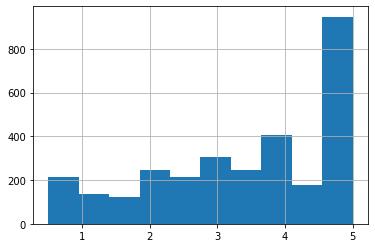

In [22]:
data['score'].hist()

Ratings are mostly 5 stars with very few ratings has 1 star. But there can also be a possibility of false or fake reviews by makers . Nonetheless movie can be said to get positive reviews from audience overall!!

1    1775
0    1235
Name: sentiment, dtype: int64


<AxesSubplot:>

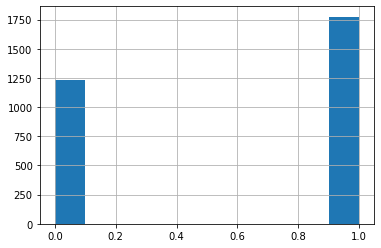

In [23]:
print(data['sentiment'].value_counts())
data['sentiment'].hist()

Based on 3 stars as threshold , movie has got around 80% positive audience reviews.

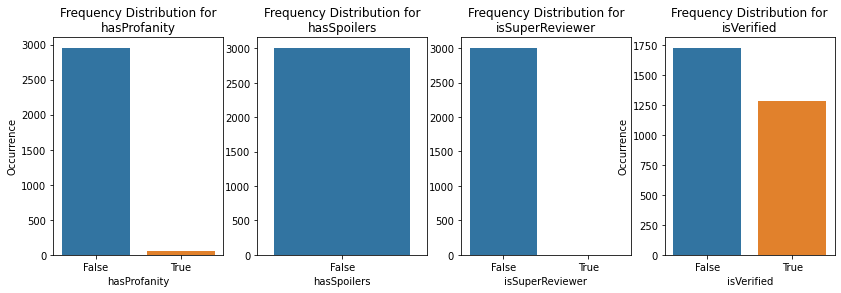

In [24]:
#code for iterating and creating histograms for below columns.
cat_dtypes = ["hasProfanity","hasSpoilers","isSuperReviewer",'isVerified']
increment = 0
f, axes = plt.subplots(1,len(cat_dtypes), figsize=(14,4), sharex=False)

for i in range(len(cat_dtypes)):
    sns.countplot(x=cat_dtypes[increment], data=data,order=data[cat_dtypes[increment]].value_counts().index, ax=axes[i])
    axes[i].set_title("Frequency Distribution for\n{}".format(cat_dtypes[increment]))
    axes[i].set_ylabel("Occurrence")
    axes[i].set_xlabel("{}".format(cat_dtypes[increment]))
    increment += 1
axes[1].set_ylabel("")
axes[2].set_ylabel("")
plt.show()

Histogram for each of above columns. As we can see , not many users has profanity , and is super users. Also none of the reviews contaions spoilers . So its safe to drop these rows. Although distribution in verified customers is more significant.

In [25]:
x = ["hasProfanity","hasSpoilers","isSuperReviewer"]
for i in  x:
    data.drop([i],axis=1,inplace = True)

In [26]:
data['sentiment'] = data['sentiment'].astype('category')

In [27]:
var1 = data.groupby('isVerified').sentiment.value_counts(normalize=True) #group verified customers wrt to sentiment .

Text(0.5, 1.0, 'Verified reviews for each sentiments')

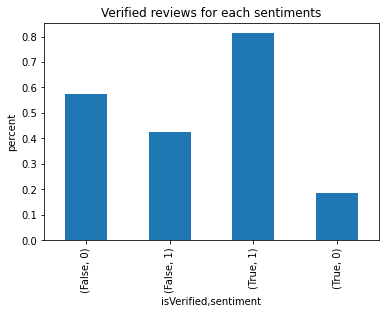

In [28]:
var1.plot(kind='bar')
plt.ylabel('percent')
plt.title('Verified reviews for each sentiments')

This Shows that non verified customers usually tends to give negative reviews. Potentially Fake users are sending out negative reviews!! Intresting!

In [29]:
data['create_day'] = data['Create_time'].dt.day

In [30]:
data['create_day']  = data['create_day'].astype('category')

In [31]:
var = data.groupby('create_day').sentiment.value_counts(normalize=True)

Text(0, 0.5, 'percent')

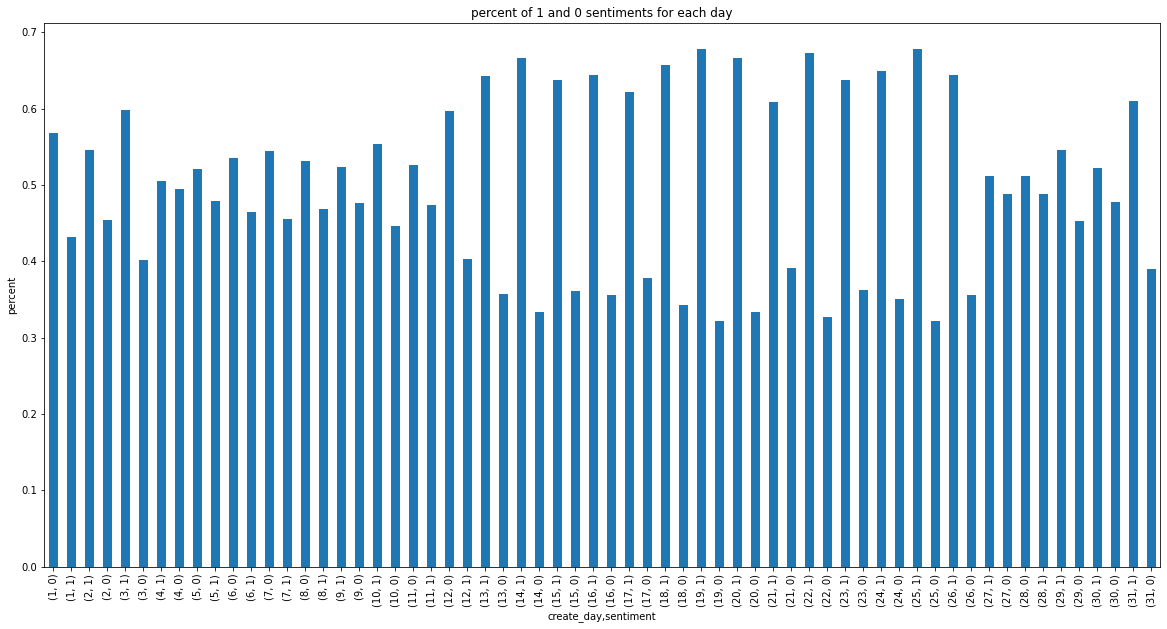

In [32]:
var.plot(kind='bar',figsize=(20,10))
plt.title('percent of 1 and 0 sentiments for each day')
plt.ylabel('percent')

Here we can see percentage of positive and negative reviews per day starting from 2nd August to 20 August. Percentage of positive and negative reviews has remained more or less stable over the days . Intresting thing to note here can be positive reviews drops and rises alternative days

In [33]:
data['review'] = data['review'].astype('str') ##converting reviews objects into string.

In [35]:
import spacy
import itertools as it

nlp = spacy.load('en_core_web_sm')

In [36]:

import unicodedata


In [37]:
def remove_accented_chars(text):
    """Remove non-ASCII characters from list of tokenized words"""
    text = unicodedata.normalize('NFKD', text).encode(
        'ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [38]:
data['review'] = [remove_accented_chars(
    each_blog_text) for each_blog_text in data['review']]

In [39]:
data['review'] = [each_blog_text.strip().lower() for each_blog_text in data['review']]  #converting text to lowercase

In [40]:
def scrub_words(text):
    # Replace \xao characters in text -
    # \xa0 is actually non-breaking space in Latin1 (ISO 8859-1), also chr(160).
    text = re.sub('\xa0', ' ', text)

    # Replace non ascii and digits
    text = re.sub("(\\W|\\d)", ' ', text)

    # Replace new line characters and following text untill space
    text = re.sub('\n(\w*?)[\s]', '', text)

    # Remove html markup
    text = re.sub("<.*?>", ' ', text)

    return text
data['review'] = [scrub_words(each_blog_text) for each_blog_text in data['review']]

In [41]:
def tokenize_lemmatizing_text(text, remove_stopwords=True):
    doc = nlp(text)
    # first tokenize by sentence, then by word to ensure that
    # punctuation is caught as it's own token
    if remove_stopwords:
        tokens = [word.lemma_ for word in doc if not word.is_stop]
    else:
        tokens = [word.lemma_ for word in doc]

    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)

    return filtered_tokens

In [42]:
data['spacied_text'] = [tokenize_lemmatizing_text(each_blog_text)
                           for each_blog_text in data['review']]

In [43]:
data

,review,displayName,isVerified,score,sentiment,Create_time,Update_time,create_day,spacied_text
0,i like this it is at times slow because it is...,Miller M,False,4.0,1,2021-02-07 16:49:35.438000+00:00,2021-02-08 01:28:02.662000+00:00,7,"[like, time, slow, long, original, good, great..."
1,completely ruined i feel robbed of my childhood,Andrew B,False,1.0,0,2021-02-06 18:17:14.650000+00:00,2021-02-06 18:17:14.590000+00:00,6,"[completely, ruin, feel, rob, childhood]"
2,wonderful to see this disney classic brought t...,John B,False,4.0,1,2021-02-01 14:22:36.165000+00:00,2021-02-01 14:22:36.322000+00:00,1,"[wonderful, disney, classic, bring, life, big,..."
3,only saving grace is nostalgia ultimately fal...,None,False,1.5,0,2021-02-01 01:32:22.080000+00:00,2021-02-01 01:32:22.142000+00:00,1,"[save, grace, nostalgia, ultimately, fall, fla..."
4,there s no doubt that this is technical achiev...,Ben L,False,0.5,0,2021-01-28 17:35:03.389000+00:00,2021-01-28 17:35:03.376000+00:00,28,"[s, doubt, technical, achievement, need, shot,..."
...,...,...,...,...,...,...,...,...,...
3005,really enjoyed the movie,G W,False,4.0,1,2019-08-13 01:36:59.310000+00:00,2019-08-13 01:36:59.310000+00:00,13,"[enjoy, movie]"
3006,the movie was enjoyable mainly because it was ...,SG,True,3.0,0,2019-08-13 01:22:29.511000+00:00,2019-08-13 01:22:30.239000+00:00,13,"[movie, enjoyable, mainly, like, original, lio..."
3007,i really had high hopes for this but as they s...,Eric,True,0.5,0,2019-08-13 01:16:09.814000+00:00,2019-08-13 01:16:09.814000+00:00,13,"[high, hope, nt, improve, perfection, movie, r..."
3008,quite realistic animals a couple of faux paux...,Darlene K,True,5.0,1,2019-08-13 01:03:50.989000+00:00,2019-08-13 01:03:50.989000+00:00,13,"[realistic, animal, couple, faux, pauxs, term,..."


In [44]:
##Function for creating a wordcloud.
stopwords = set(STOPWORDS)
size = (10,7)

def cloud(text, title, stopwords=stopwords, size=size):
    mpl.rcParams['figure.figsize']=(10.0,10.0)          ##Setting wordcloud parameters
    mpl.rcParams['font.size']=12
    mpl.rcParams['savefig.dpi']=100
    mpl.rcParams['figure.subplot.bottom']=.1 

    wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',        ##creating wordcloud object and excluding stopwords
                          stopwords=stopwords,
                         ).generate(str(text))
    
    fig = plt.figure(figsize=size, dpi=80, facecolor='k',edgecolor='k')
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=50,color='y')               ##Some Asthetics.
    plt.tight_layout(pad=0)
    plt.show()

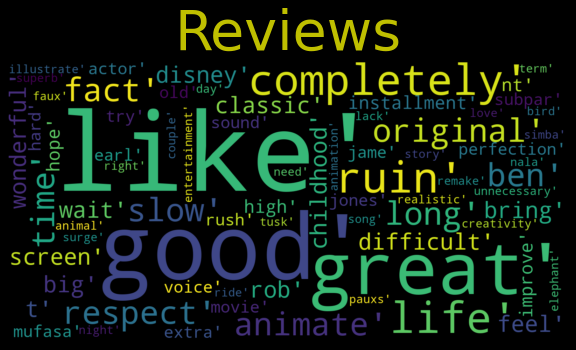

In [45]:
new_stop = set(STOPWORDS)

# Creating wordCloud
cloud(text= data.spacied_text[data.spacied_text.notnull()].astype(str).values,
      title='Reviews',
      stopwords= new_stop,
      size = (7,4))

word cloud for most occured words. loved is occured most number of times.

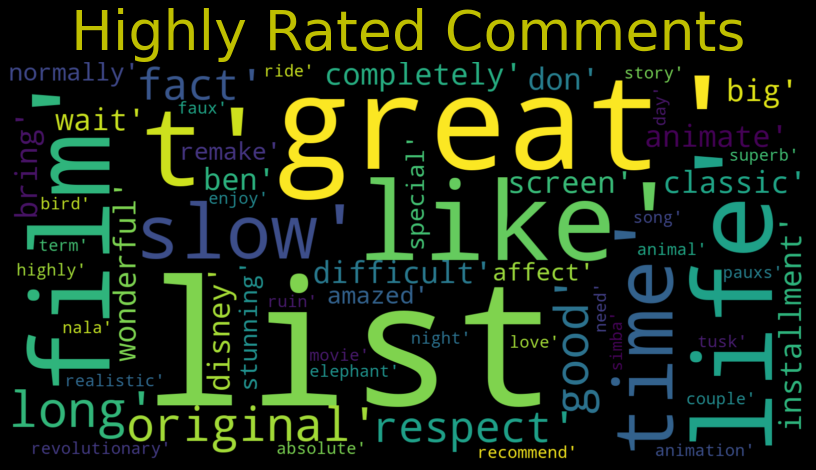

In [46]:
# Highly Rated
title ="Highly Rated Comments"
temp = data['spacied_text'][data.sentiment.astype(int) == 1]


new_stop = set(STOPWORDS)

# Cloud
cloud(text= temp.values, title=title,stopwords= new_stop)

Most Occuring words in positive rated reviews. Looks like audience liked humour of movie as words like 'funny' and 'jokes' were occured very frequently.

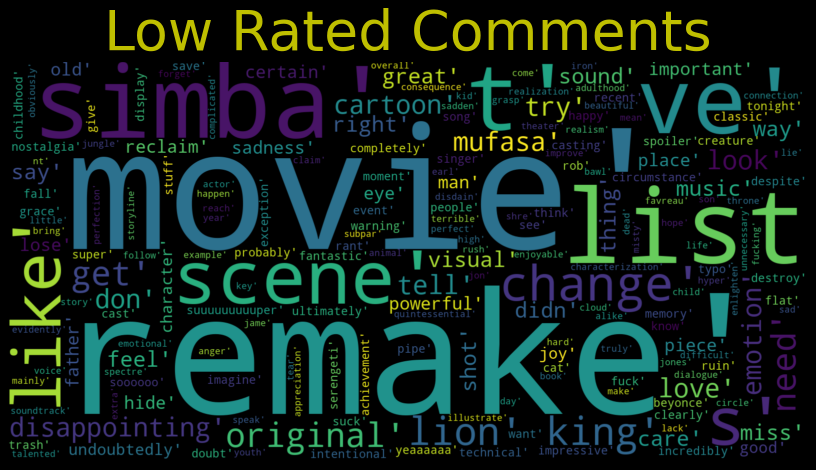

In [47]:
title ="Low Rated Comments"
temp = data['spacied_text'][data.sentiment.astype(int) == 0]


new_stop = set(STOPWORDS)

# Cloud
cloud(text= temp.values, title=title,stopwords= new_stop)

Most occured words in low rated reviews.

In [48]:
data['final_text'] = [' '.join(each_word) for each_word in data['spacied_text']]

In [49]:
data

,review,displayName,isVerified,score,sentiment,Create_time,Update_time,create_day,spacied_text,final_text
0,i like this it is at times slow because it is...,Miller M,False,4.0,1,2021-02-07 16:49:35.438000+00:00,2021-02-08 01:28:02.662000+00:00,7,"[like, time, slow, long, original, good, great...",like time slow long original good great respec...
1,completely ruined i feel robbed of my childhood,Andrew B,False,1.0,0,2021-02-06 18:17:14.650000+00:00,2021-02-06 18:17:14.590000+00:00,6,"[completely, ruin, feel, rob, childhood]",completely ruin feel rob childhood
2,wonderful to see this disney classic brought t...,John B,False,4.0,1,2021-02-01 14:22:36.165000+00:00,2021-02-01 14:22:36.322000+00:00,1,"[wonderful, disney, classic, bring, life, big,...",wonderful disney classic bring life big screen...
3,only saving grace is nostalgia ultimately fal...,None,False,1.5,0,2021-02-01 01:32:22.080000+00:00,2021-02-01 01:32:22.142000+00:00,1,"[save, grace, nostalgia, ultimately, fall, fla...",save grace nostalgia ultimately fall flat cat ...
4,there s no doubt that this is technical achiev...,Ben L,False,0.5,0,2021-01-28 17:35:03.389000+00:00,2021-01-28 17:35:03.376000+00:00,28,"[s, doubt, technical, achievement, need, shot,...",s doubt technical achievement need shot shot r...
...,...,...,...,...,...,...,...,...,...,...
3005,really enjoyed the movie,G W,False,4.0,1,2019-08-13 01:36:59.310000+00:00,2019-08-13 01:36:59.310000+00:00,13,"[enjoy, movie]",enjoy movie
3006,the movie was enjoyable mainly because it was ...,SG,True,3.0,0,2019-08-13 01:22:29.511000+00:00,2019-08-13 01:22:30.239000+00:00,13,"[movie, enjoyable, mainly, like, original, lio...",movie enjoyable mainly like original lion king...
3007,i really had high hopes for this but as they s...,Eric,True,0.5,0,2019-08-13 01:16:09.814000+00:00,2019-08-13 01:16:09.814000+00:00,13,"[high, hope, nt, improve, perfection, movie, r...",high hope nt improve perfection movie rush voi...
3008,quite realistic animals a couple of faux paux...,Darlene K,True,5.0,1,2019-08-13 01:03:50.989000+00:00,2019-08-13 01:03:50.989000+00:00,13,"[realistic, animal, couple, faux, pauxs, term,...",realistic animal couple faux pauxs term day ni...


The below code is for most occured ngram words occured in final_text.Function is borrowed from google and this function creates a nice DataFrame for ngram frequencies.

In [50]:
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(STOPWORDS)
def preprocessing(data1):
    txt = data1.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    #words = [ps.stem(w) for w in words] #4
    return words
## Helper Functions
from nltk.util import ngrams
from collections import Counter
def get_ngrams(text, n):
    n_grams = ngrams((text), n)
    return [ ' '.join(grams) for grams in n_grams]

def gramfreq(text,n,num):
    # Extracting bigrams
    result = get_ngrams(text,n)
    # Counting bigrams
    result_count = Counter(result)
    # Converting to the result to a data frame
    df = pd.DataFrame.from_dict(result_count, orient='index')
    df = df.rename(columns={'index':'words', 0:'frequency'}) # Renaming index column name
    return df.sort_values(["frequency"],ascending=[0])[:num]

def gram_table(data1, gram, length):
    out = pd.DataFrame(index=None)
    for i in gram:
        table = pd.DataFrame(gramfreq(preprocessing(data1),i,length).reset_index())
        table.columns = ["{}-Gram".format(i),"Occurrence"]
        out = pd.concat([out, table], axis=1)
    return out
gram_table(data1= data['final_text'][data["sentiment"].astype(int) == 1], gram=[1,2,3,4,5], length=30)

,1-Gram,Occurrence,2-Gram,Occurrence,3-Gram,Occurrence,4-Gram,Occurrence,5-Gram,Occurrence
0,movie,953,lion king,225,original lion king,24,billy eichner seth rogen,6,agen bola online indonesia terpercaya,3
1,original,654,live action,93,lion king movie,23,lion king live action,5,lion king live action remake,2
2,love,533,great movie,87,stay true original,21,good live action disney,5,original lion king movie love,2
3,good,426,good movie,77,love lion king,20,stay true original story,4,earl jones mufasa lion king,2
4,great,417,love movie,72,animal look real,18,jame earl jone mufasa,4,voice billy eichner seth rogen,2
5,s,320,didn t,70,live action remake,18,original lion king movie,4,movie don t think good,2
6,lion,265,movie love,55,new lion king,11,live action disney remake,4,overall love movie lion king,2
7,animal,261,look real,51,movie great movie,11,year old daughter love,3,great movie love lion king,2
8,t,255,movie great,51,good live action,10,movie stay true original,3,exactly want live action remake,2
9,king,246,don t,47,version lion king,10,james earl jones mufasa,3,good live action disney remake,2


This frequncies is for positive sentiment. Looking at the frequencies, Some of the things we can say is 
1.People loved the fact that its family movie 
2.It looked real 
3.They loved timon and pumba 
4.Liked storyline 
etc
etc!!

In [51]:
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(STOPWORDS)
def preprocessing(data1):
    txt = data1.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    #words = [ps.stem(w) for w in words] #4
    return words
## Helper Functions
from nltk.util import ngrams
from collections import Counter
def get_ngrams(text, n):
    n_grams = ngrams((text), n)
    return [ ' '.join(grams) for grams in n_grams]

def gramfreq(text,n,num):
    # Extracting bigrams
    result = get_ngrams(text,n)
    # Counting bigrams
    result_count = Counter(result)
    # Converting to the result to a data frame
    df = pd.DataFrame.from_dict(result_count, orient='index')
    df = df.rename(columns={'index':'words', 0:'frequency'}) # Renaming index column name
    return df.sort_values(["frequency"],ascending=[0])[:num]

def gram_table(data1, gram, length):
    out = pd.DataFrame(index=None)
    for i in gram:
        table = pd.DataFrame(gramfreq(preprocessing(data1),i,length).reset_index())
        table.columns = ["{}-Gram".format(i),"Occurrence"]
        out = pd.concat([out, table], axis=1)
    return out
gram_table(data1= data['final_text'][data["sentiment"].astype(int) == 0], gram=[1,2,3,4,5], length=30)

,1-Gram,Occurrence,2-Gram,Occurrence,3-Gram,Occurrence,4-Gram,Occurrence,5-Gram,Occurrence
0,movie,820,lion king,235,original lion king,46,want watch lion king,6,want watch lion king watch,5
1,original,818,didn t,124,feel love tonight,22,love original lion king,6,watch lion king watch original,3
2,t,523,live action,120,jame earl jone,20,shot shot remake original,6,live action version lion king,3
3,s,464,don t,118,live action remake,20,watch lion king watch,5,jame earl jones reprise role,3
4,film,324,watch original,60,jame earl jones,18,watch original lion king,5,feel love tonight take place,2
5,good,300,wasn t,59,shot shot remake,15,disney live action remake,5,character s feeling character s,2
6,remake,293,original movie,54,version lion king,13,lion king watch original,4,s movie didn t need,2
7,lion,284,doesn t,50,movie live action,12,seth rogen billy eichner,4,bad movie ve see life,2
8,voice,269,voice act,50,s lion king,11,lion king live action,4,king watch original movie s,2
9,feel,263,voice actor,49,lion king remake,11,song feel love tonight,4,original lion king new version,2


This frequncies is for negative sentiment. Looking at the frequencies, Some of the things we can say is
1.People thought this was waste of money.  (24th 3gram)
2.They didnt like facial expression (15th 2gram)
3.People are instead suggesting to watch original movie. (29th 2gram)
4.Some people fell asleep (15th 2-gram)
Also movie lacked originality and they didnt like jame earl jones voice

etc
etc!!

So now we will create a tf-idf matrix for final_text to carry out clustering and classification like Naive Bayes or Random Forest.

# 3A.K-Means Clustering

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

# define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,4))

tfidf_matrix = tfidf_vectorizer.fit_transform(data['final_text'])

print(tfidf_matrix.shape)

(3010, 115286)


In [53]:
terms = tfidf_vectorizer.get_feature_names()
print(type(terms))
terms[45:76]

<class 'list'>


['able elevate distance',
 'able elevate distance original',
 'able engineer',
 'able engineer emotion',
 'able engineer emotion help',
 'able entertain',
 'able entertain iconic',
 'able entertain iconic song',
 'able facial',
 'able facial expression',
 'able facial expression personality',
 'able feel',
 'able feel thw',
 'able feel thw particular',
 'able forget',
 'able forget love',
 'able forget love song',
 'able help',
 'able help film',
 'able help film soar',
 'able jame',
 'able jame earl',
 'able jame earl jone',
 'able line',
 'able line essentially',
 'able line essentially script',
 'able little',
 'able little effort',
 'able little effort feel',
 'able perform',
 'able perform box']

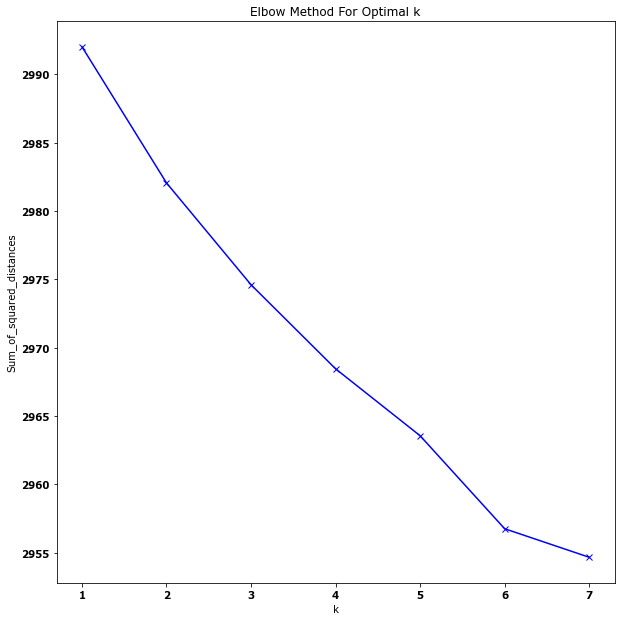

In [54]:
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

Sum_of_squared_distances = []

K = range(1,8)

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=1234)
    kmeanModel.fit(tfidf_matrix)
    Sum_of_squared_distances.append(kmeanModel.inertia_)

# Plot the elbow

# Distortion, on the y-axis, corresponds to our cost function:
# the sum of squared difference between each data point and the centroid, i.e., the cluster centre.

# As K increases the corresponding distortion value will tend to zero,
# because you end up having just one data point per cluster. With only one data point in per cluster,
# the centroid is the data point itself, so the distortion will be equal to zero.

font = {'family': 'verdana',
        'weight': 'bold',
        'size': 10}

plt.rc('font', **font)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [55]:
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
num_clusters = 2   ##selecting k = 2 clusters

km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_matrix)
#km.labels_
clusters = km.labels_.tolist()
#km.cluster_centers
centers = km.cluster_centers_
centers


array([[1.65240606e-05, 1.65240606e-05, 1.65240606e-05, ...,
        1.67259022e-05, 1.67259022e-05, 1.67259022e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [56]:
km.cluster_centers_.argsort()

array([[43293, 42145, 42144, ..., 55827, 65935, 74329],
       [    0, 76765, 76764, ..., 61057, 43467, 65935]], dtype=int64)

In [57]:
data['cluster_id'] = clusters
data.head()

,review,displayName,isVerified,score,sentiment,Create_time,Update_time,create_day,spacied_text,final_text,cluster_id
0,i like this it is at times slow because it is...,Miller M,False,4.0,1,2021-02-07 16:49:35.438000+00:00,2021-02-08 01:28:02.662000+00:00,7,"[like, time, slow, long, original, good, great...",like time slow long original good great respec...,0
1,completely ruined i feel robbed of my childhood,Andrew B,False,1.0,0,2021-02-06 18:17:14.650000+00:00,2021-02-06 18:17:14.590000+00:00,6,"[completely, ruin, feel, rob, childhood]",completely ruin feel rob childhood,0
2,wonderful to see this disney classic brought t...,John B,False,4.0,1,2021-02-01 14:22:36.165000+00:00,2021-02-01 14:22:36.322000+00:00,1,"[wonderful, disney, classic, bring, life, big,...",wonderful disney classic bring life big screen...,0
3,only saving grace is nostalgia ultimately fal...,None,False,1.5,0,2021-02-01 01:32:22.080000+00:00,2021-02-01 01:32:22.142000+00:00,1,"[save, grace, nostalgia, ultimately, fall, fla...",save grace nostalgia ultimately fall flat cat ...,0
4,there s no doubt that this is technical achiev...,Ben L,False,0.5,0,2021-01-28 17:35:03.389000+00:00,2021-01-28 17:35:03.376000+00:00,28,"[s, doubt, technical, achievement, need, shot,...",s doubt technical achievement need shot shot r...,0


In [58]:
data['cluster_id'].value_counts()

0    2763
1     247
Name: cluster_id, dtype: int64

In [59]:

from __future__ import print_function

print("Top terms per cluster:")

# sort cluster centers by proximity to centroid and picking the top 6 words per cluster
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

for i in range(num_clusters):
    print()
    print("Top words in Cluster-%d :" % i, end='')
    print()
    for ind in order_centroids[i, :6]:  # replace 6 with n words per cluster
        print('%s' % terms[ind].split(' '), end=',')

Top terms per cluster:

Top words in Cluster-0 :
['original'],['movie'],['like'],['love'],['good'],['well'],
Top words in Cluster-1 :
['movie'],['great'],['love'],['great', 'movie'],['good'],['love', 'movie'],

These are the top ngrams appearing in each clusters.

Text(0, 0.5, 'percent')

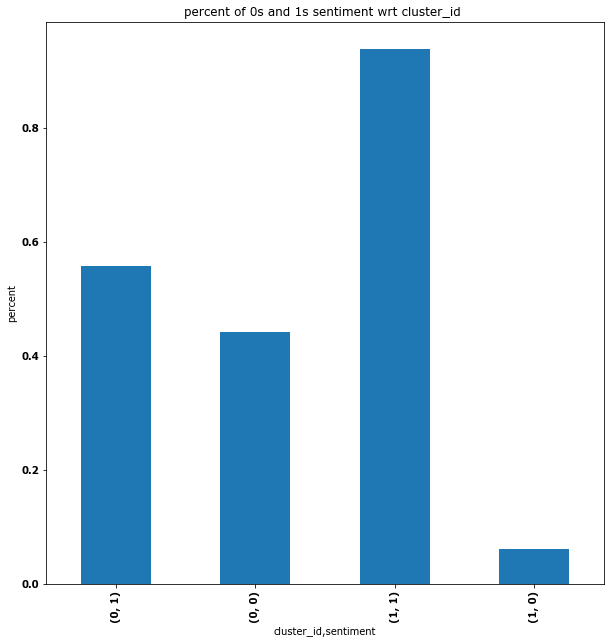

In [60]:
var = data.groupby('cluster_id').sentiment.value_counts(normalize=True)
var.plot(kind='bar')
plt.title('percent of 0s and 1s sentiment wrt cluster_id ')
plt.ylabel('percent')

Comaparison of clusters wrt to sentiment. Here cluster id 1 has most percent of negative reviews . Now the cluster id may change when we run the code every time .

No handles with labels found to put in legend.


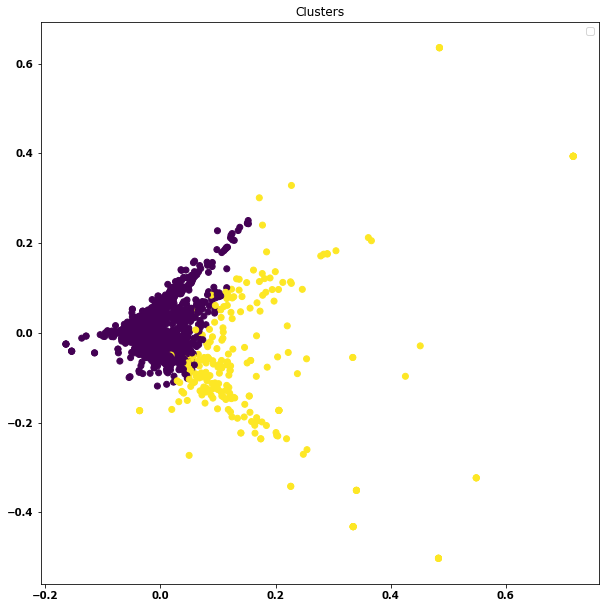

In [61]:
from sklearn.decomposition import PCA
mat1 = tfidf_matrix.todense()
X_pca = PCA(2).fit_transform(mat1)# performing PCA to reduce dimensionality.

plt.scatter(X_pca[:,0],X_pca[:,1],c=km.labels_.astype(float))
plt.title("Clusters")
plt.legend()
plt.show()



As we see here , KMeans doesnt work here that well because data is not distinct enough. We have to try something else.

In [63]:
data['no_of_words'] = data['review'].apply(len)  ##Extracting No of words from review

In [64]:
data

,review,displayName,isVerified,score,sentiment,Create_time,Update_time,create_day,spacied_text,final_text,cluster_id,no_of_words
0,i like this it is at times slow because it is...,Miller M,False,4.0,1,2021-02-07 16:49:35.438000+00:00,2021-02-08 01:28:02.662000+00:00,7,"[like, time, slow, long, original, good, great...",like time slow long original good great respec...,0,216
1,completely ruined i feel robbed of my childhood,Andrew B,False,1.0,0,2021-02-06 18:17:14.650000+00:00,2021-02-06 18:17:14.590000+00:00,6,"[completely, ruin, feel, rob, childhood]",completely ruin feel rob childhood,0,49
2,wonderful to see this disney classic brought t...,John B,False,4.0,1,2021-02-01 14:22:36.165000+00:00,2021-02-01 14:22:36.322000+00:00,1,"[wonderful, disney, classic, bring, life, big,...",wonderful disney classic bring life big screen...,0,110
3,only saving grace is nostalgia ultimately fal...,None,False,1.5,0,2021-02-01 01:32:22.080000+00:00,2021-02-01 01:32:22.142000+00:00,1,"[save, grace, nostalgia, ultimately, fall, fla...",save grace nostalgia ultimately fall flat cat ...,0,77
4,there s no doubt that this is technical achiev...,Ben L,False,0.5,0,2021-01-28 17:35:03.389000+00:00,2021-01-28 17:35:03.376000+00:00,28,"[s, doubt, technical, achievement, need, shot,...",s doubt technical achievement need shot shot r...,0,108
...,...,...,...,...,...,...,...,...,...,...,...,...
3005,really enjoyed the movie,G W,False,4.0,1,2019-08-13 01:36:59.310000+00:00,2019-08-13 01:36:59.310000+00:00,13,"[enjoy, movie]",enjoy movie,1,24
3006,the movie was enjoyable mainly because it was ...,SG,True,3.0,0,2019-08-13 01:22:29.511000+00:00,2019-08-13 01:22:30.239000+00:00,13,"[movie, enjoyable, mainly, like, original, lio...",movie enjoyable mainly like original lion king...,0,404
3007,i really had high hopes for this but as they s...,Eric,True,0.5,0,2019-08-13 01:16:09.814000+00:00,2019-08-13 01:16:09.814000+00:00,13,"[high, hope, nt, improve, perfection, movie, r...",high hope nt improve perfection movie rush voi...,0,346
3008,quite realistic animals a couple of faux paux...,Darlene K,True,5.0,1,2019-08-13 01:03:50.989000+00:00,2019-08-13 01:03:50.989000+00:00,13,"[realistic, animal, couple, faux, pauxs, term,...",realistic animal couple faux pauxs term day ni...,0,195


In [65]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tx08\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

# 3B.LDA Topic Modelling

In [66]:
dictionary = gensim.corpora.Dictionary(data['spacied_text'])
dictionary.filter_extremes(no_below=15, no_above=0.2, keep_n=10000)##keep words which occurs more than 15 times and not more than 50%  and keep only 10000 words .

In [67]:
bow_corpus = [dictionary.doc2bow(doc) for doc in data['spacied_text']]
bow_corpus[2401]#gives us words and their frequencies in the particular document.
bow_doc_2401 = bow_corpus[2401]
for i in range(len(bow_doc_2401)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_2401[i][0], 
                                               dictionary[bow_doc_2401[i][0]], 
bow_doc_2401[i][1]))

Word 71 ("voice") appears 1 time.
Word 178 ("act") appears 1 time.
Word 399 ("singe") appears 1 time.
Word 434 ("disappointing") appears 1 time.


In [68]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break
    
##calculates tfidf for bag of words

[(0, 0.3277688596972283),
 (1, 0.40308105893193313),
 (2, 0.43423319087933177),
 (3, 0.1623537225550567),
 (4, 0.18131131485440485),
 (5, 0.42195598550642033),
 (6, 0.4931356429308383),
 (7, 0.247128772761532)]


tfidf for first review 

In [69]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=13, id2word=dictionary, passes=2, workers=2)

In [70]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=6, id2word=dictionary, passes=10, workers=4,gamma_threshold=0.2)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))
    #taking words and their weights for each topic.

Topic: 0 Word: 0.022*"family" + 0.020*"awesome" + 0.019*"s" + 0.019*"king" + 0.019*"childhood" + 0.016*"absolutely" + 0.016*"pretty" + 0.016*"love" + 0.015*"child" + 0.015*"good"
Topic: 1 Word: 0.046*"well" + 0.041*"great" + 0.022*"cartoon" + 0.020*"version" + 0.015*"old" + 0.014*"fun" + 0.014*"nice" + 0.014*"miss" + 0.014*"animated" + 0.013*"shot"
Topic: 2 Word: 0.029*"t" + 0.020*"enjoy" + 0.018*"bad" + 0.017*"think" + 0.016*"didn" + 0.014*"visual" + 0.013*"s" + 0.013*"need" + 0.012*"film" + 0.012*"change"
Topic: 3 Word: 0.049*"amazing" + 0.033*"beautiful" + 0.030*"story" + 0.028*"real" + 0.027*"kid" + 0.027*"animal" + 0.026*"realistic" + 0.021*"look" + 0.019*"good" + 0.019*"love"
Topic: 4 Word: 0.038*"good" + 0.023*"true" + 0.018*"wonderful" + 0.017*"stay" + 0.016*"fantastic" + 0.015*"incredible" + 0.012*"lion" + 0.012*"de" + 0.011*"perfect" + 0.011*"d"
Topic: 5 Word: 0.066*"love" + 0.027*"animation" + 0.026*"nt" + 0.019*"life" + 0.019*"disney" + 0.018*"great" + 0.017*"excellent" + 0

In [71]:
def explore_topic(topic_number, topn=6):
    """
    accept a user-supplied topic number and
    print out a formatted list of the top terms
    """

    print(u'{:20} {}'.format(u'term', u'frequency') + u'\n')

    for term, frequency in lda_model_tfidf.show_topic(topic_number, topn=10):
        print(u'{:20} {:.3f}'.format(term, round(frequency, 3)))
explore_topic(topic_number=2)

term                 frequency

t                    0.029
enjoy                0.020
bad                  0.018
think                0.017
didn                 0.016
visual               0.014
s                    0.013
need                 0.013
film                 0.012
change               0.012


Yes we've carried out LDA  topic modelling but we failed to get any meaningful insights from it. So just relying on frequency of words in each sentiment we will derive some conclusions.

# 4.Conclusions from Visualizations.....

1.Movie was 80% Sucess among audience.
2.Percent of positive Movie review was more or less satble from August 2 to August 20.So there wasnt decline or increase in positive reviews as days went. 
3.Non verified reviews has high percent of negative reviews . Rotten Tomatoes need to verify all the reviews.
4.From ngram frequencies , we can say that audience loved the fact that  the movie was family friendly, they loved Timon and pumbas jokes ,  Real Animation.
5.But people thought tickets were costly (maybe disney could reduce budget a little bit) , audience didnt like character expressions (So Disney can create better expressions for characters for next movies) , And people liked original movie more.


Where Disney couldve perform better in future going purely by these reviews.

1.Bring more emotions to the film , dont just flately make the movie based on technologies
2.Try to bring some slightly different storyline to the film in case of remakes. But not much that the esscence of original movie goes away.
3.Select the voice artist more rigously . Audience didnt like Beyonce and jame earl jones
 These things would've significantly improved reviews based on word occurances.

# 5.Ontowards model building

In [72]:
Text_data= data['final_text']
Text_data_list = Text_data.tolist()
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(Text_data_list,data['sentiment'],test_size=0.25,random_state=124)#train validation split

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_transformer = TfidfVectorizer(ngram_range=(1,3),norm='l2',\
                                    max_df=0.9,min_df=0.004)
#min_df ensures that extremely low frequency words are not considered for model building as they are not useful.
tfidf_train = tfidf_transformer.fit_transform(X_train) 
tfidf_train.shape

(2257, 761)

In [74]:
tfidf_test = tfidf_transformer.transform(X_test)

mat1 = tfidf_test.todense()
mat2 = tfidf_train.todense()

Some of the best Text classification algorithms are 

1.Naive Bayes   - Nice and simple and effective.Can be our base model. 

2.SVM     - Linear Kernal gives good classsification

3.Random Forest   - Feature space is relatively small so weak learners can classify well.

4.XGBoosting    - Seldom Overfits

4.CNN and RNN

Lets try them one by one

# 5a.Naive Bayes

In [75]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
lr_clf = classifier.fit(tfidf_train,y_train)
traim_pred = classifier.predict(tfidf_train)
test_pred=classifier.predict(tfidf_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))
naive_bayes_validation = classification_report(y_test,test_pred)
print(classification_report(y_train,traim_pred))
naive_bayes_train=classification_report(y_train,traim_pred)

              precision    recall  f1-score   support

           0       0.78      0.65      0.71       310
           1       0.78      0.87      0.82       443

    accuracy                           0.78       753
   macro avg       0.78      0.76      0.77       753
weighted avg       0.78      0.78      0.78       753

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       925
           1       0.85      0.92      0.88      1332

    accuracy                           0.86      2257
   macro avg       0.86      0.84      0.85      2257
weighted avg       0.86      0.86      0.85      2257



We  got 0.71 f1 score for 0, which is decent but can we get more by reducing class imbalace?

In [76]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2,k_neighbors=10)##Making our model robust to any class imbalance
X_train_res, y_train_res = sm.fit_sample(tfidf_train, y_train.ravel())
lr_clf = classifier.fit(X_train_res,y_train_res)
traim_pred = classifier.predict(X_train_res)
test_pred=classifier.predict(tfidf_test)
NB_smoted_valid = classification_report(y_test,test_pred)
NB_smoted_train = classification_report(y_train_res,traim_pred)
print(classification_report(y_test,test_pred))

print(classification_report(y_train_res,traim_pred))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75       310
           1       0.84      0.77      0.80       443

    accuracy                           0.78       753
   macro avg       0.77      0.78      0.78       753
weighted avg       0.79      0.78      0.78       753

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1332
           1       0.87      0.82      0.85      1332

    accuracy                           0.85      2664
   macro avg       0.85      0.85      0.85      2664
weighted avg       0.85      0.85      0.85      2664



0.75 on validation which is good but it overfits slightly.

# 5b.Support Vector Machines

In [77]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV
SVM = SVC()
svc_param_grid = {'kernel':['rbf','linear','poly'], 'C': [0.2,0.5,5]}#Grid searching among these parameters
svc_grid = GridSearchCV(SVM, svc_param_grid, cv=4,scoring='f1')
svc_grid.fit(X_train_res, y_train_res)
svc_grid.best_params_

{'C': 5, 'kernel': 'rbf'}

The best parameters

In [78]:

p = SVC(kernel="linear", C=5,)
p.fit(X_train_res,y_train_res)
train_pred = p.predict(X_train_res)
test_pred = p.predict(tfidf_test)
print(classification_report(y_train_res,train_pred))
print(classification_report(y_test,test_pred))
svm_train = classification_report(y_train_res,train_pred)
svm_test = classification_report(y_test,test_pred)

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1332
           1       0.93      0.90      0.91      1332

    accuracy                           0.92      2664
   macro avg       0.92      0.92      0.92      2664
weighted avg       0.92      0.92      0.92      2664

              precision    recall  f1-score   support

           0       0.71      0.77      0.74       310
           1       0.83      0.78      0.80       443

    accuracy                           0.78       753
   macro avg       0.77      0.77      0.77       753
weighted avg       0.78      0.78      0.78       753



Model is significantly overfitting . Not Good!! We simply need more data to reduce overfitting. Intresting thing to notice here is linear kernel works good here which means our data is linearly seperable. But from K means clustering , we deduced that our data wasnt distinct enough.Mysterious!

# 5c.Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {"n_estimators" : [150, 250, 300],
              "max_depth" : [20,25],
              "criterion" : ['gini','entropy'],
              "min_samples_leaf" : [4, 6, 8, 10]}
rf = RandomForestClassifier()
clf = GridSearchCV(rf, param_grid, cv=5,scoring = 'f1')
clf.fit(X_train_res, y_train_res)
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 6,
 'n_estimators': 150}

In [80]:
clf = RandomForestClassifier(max_features='sqrt',max_depth=25,criterion='entropy',  n_estimators=300,min_samples_leaf=4)
clf.fit(X_train_res,y_train_res)
train_pred = clf.predict(X_train_res)
test_pred = clf.predict(tfidf_test) 
print(classification_report(y_train_res,train_pred))
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1332
           1       0.89      0.83      0.86      1332

    accuracy                           0.86      2664
   macro avg       0.86      0.86      0.86      2664
weighted avg       0.86      0.86      0.86      2664

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       310
           1       0.82      0.74      0.78       443

    accuracy                           0.75       753
   macro avg       0.75      0.76      0.75       753
weighted avg       0.76      0.75      0.75       753



0.72 with slight overfitting.....Lets try giving manual class weights. 

In [81]:
clf = RandomForestClassifier(max_features='sqrt',max_depth=20,criterion='entropy',  n_estimators=400,class_weight={0:0.71,1:0.29},min_samples_leaf=4)
clf.fit(tfidf_train,y_train)
train_pred = clf.predict(tfidf_train)
test_pred = clf.predict(tfidf_test)                             
print(classification_report(y_train,train_pred))
print(classification_report(y_test,test_pred))
rfctrain = classification_report(y_train,train_pred)
rfctest = classification_report(y_test,test_pred)

              precision    recall  f1-score   support

           0       0.61      0.97      0.74       925
           1       0.96      0.56      0.71      1332

    accuracy                           0.73      2257
   macro avg       0.78      0.76      0.73      2257
weighted avg       0.82      0.73      0.72      2257

              precision    recall  f1-score   support

           0       0.58      0.92      0.71       310
           1       0.90      0.53      0.67       443

    accuracy                           0.69       753
   macro avg       0.74      0.72      0.69       753
weighted avg       0.77      0.69      0.69       753



0.71 with almost no overfitting ....This seems good..

# 5d.XGBoost

In xgboost , most important parameters are n estimators and learning rate. There is always tradeoff between n estimators and learning rate . more learning rate gives us better speed while more n estimators will give us nice accuracy.Lets check on this fact!


In [82]:
from xgboost import XGBClassifier

xgbm1 = XGBClassifier(learning_rate = 0.9,n_estimators=200,subsample=0.8,max_depth=9)
xgbm1.fit(tfidf_train,y_train)

xgbmtrain_pred_pointnine_lR= xgbm1.predict(tfidf_train)

xgbmtest_pred__pointnine_lR = xgbm1.predict(tfidf_test)

xgbm = XGBClassifier(learning_rate = 0.5,n_estimators=200,subsample=0.8,max_depth=9)
xgbm.fit(tfidf_train,y_train)

xgbmtrain_pred_pointfiveLR= xgbm.predict(tfidf_train)

xgbmtest_pred__pointfiveLR = xgbm.predict(tfidf_test)

print('for 0.9 lr test',classification_report(y_test,xgbmtest_pred__pointnine_lR))
print('for 0.9 lr train',classification_report(y_train,xgbmtrain_pred_pointnine_lR))

print('for 0.5 lr test',classification_report(y_test,xgbmtest_pred__pointfiveLR))
print('for 0.5 lr train',classification_report(y_train,xgbmtrain_pred_pointfiveLR))

[19:28:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:28:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
for 0.9 lr test               precision    recall  f1-score   support

           0       0.69      0.65      0.67       310
           1       0.76      0.80      0.78       443

    accuracy                           0.74       753
   macro avg       0.73      0.72      0.73       753
weighted avg       0.74      0.74      0.74       753

for 0.9 lr train               precis

So here for low learning rates , we get good accuracy. Now lets do grid search with CV for good results

In [83]:
from sklearn.model_selection import GridSearchCV
xgbm = XGBClassifier()
xgbm_param_grid = {'learning_rate':[0.1,0.3,0.5], 'n_estimators': [1000,700,800], 'subsample': [0.3,0.6,0.9]}
xgbm_grid = GridSearchCV(xgbm, xgbm_param_grid, cv=5,scoring='f1')
xgbm_grid.fit(tfidf_train, y_train)
xgbm_grid.best_params_

[19:28:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:28:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:28:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:28:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:29:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:29:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:29:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:29:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:30:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:30:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:30:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:30:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:31:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:31:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:31:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:31:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:32:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:32:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:32:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:32:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:33:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'learning_rate': 0.1, 'n_estimators': 700, 'subsample': 0.9}

In [84]:
xgbm1 = XGBClassifier(learning_rate=0.1,n_estimators=700,subsample=0.9,reg_lambda=0.6,reg_alpha=0.4)
xgbm1.fit(tfidf_train,y_train)
xgbmtrain_pred= xgbm1.predict(tfidf_train)
xgbmtest_pred = xgbm1.predict(tfidf_test)
print(classification_report(y_train,xgbmtrain_pred))
print(classification_report(y_test,xgbmtest_pred))

[19:33:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       925
           1       0.98      0.98      0.98      1332

    accuracy                           0.97      2257
   macro avg       0.97      0.97      0.97      2257
weighted avg       0.97      0.97      0.97      2257

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       310
           1       0.78      0.78      0.78       443

    accuracy                           0.74       753
   macro avg       0.74      0.74      0.74       753
weighted avg       0.74      0.74      0.74       753



0.69 , with overfitting....lets try and increase n estimators and reduce Lr

In [85]:
xgbm1 = XGBClassifier(learning_rate=0.05,n_estimators=1500,subsample=0.9,reg_lambda=0.6,reg_alpha=0.4)
xgbm1.fit(tfidf_train,y_train)
xgbmtrain_pred= xgbm1.predict(tfidf_train)
xgbmtest_pred = xgbm1.predict(tfidf_test)
print(classification_report(y_train,xgbmtrain_pred))
print(classification_report(y_test,xgbmtest_pred))

[19:33:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       925
           1       0.98      0.98      0.98      1332

    accuracy                           0.98      2257
   macro avg       0.97      0.98      0.98      2257
weighted avg       0.98      0.98      0.98      2257

              precision    recall  f1-score   support

           0       0.70      0.71      0.70       310
           1       0.79      0.79      0.79       443

    accuracy                           0.75       753
   macro avg       0.75      0.75      0.75       753
weighted avg       0.75      0.75      0.75       753



More fine tuning

In [86]:
xgbm1 = XGBClassifier(learning_rate=0.01,n_estimators=4000,subsample=0.9,reg_lambda=0.6,reg_alpha=0.4)
xgbm1.fit(tfidf_train,y_train)
xgbmtrain_pred= xgbm1.predict(tfidf_train)
xgbmtest_pred = xgbm1.predict(tfidf_test)
print(classification_report(y_train,xgbmtrain_pred))
print(classification_report(y_test,xgbmtest_pred))

[19:34:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       925
           1       0.95      0.98      0.96      1332

    accuracy                           0.96      2257
   macro avg       0.96      0.95      0.96      2257
weighted avg       0.96      0.96      0.96      2257

              precision    recall  f1-score   support

           0       0.70      0.71      0.70       310
           1       0.79      0.79      0.79       443

    accuracy                           0.75       753
   macro avg       0.75      0.75      0.75       753
weighted avg       0.75      0.75      0.75       753



This is the best we have got.......Not good  compared to other models!!

# 5e.Convoluted Neural networks

In [88]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical

# Deep Learning Model - Keras
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Convolution1D, MaxPooling1D, SeparableConv1D, SpatialDropout1D, \
    GlobalAvgPool1D, GlobalMaxPool1D, GlobalMaxPooling1D 
#from keras.layers.pooling import _GlobalPooling1D
from keras.layers import MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D

from keras.layers import MaxPooling3D, GlobalMaxPooling3D, GlobalAveragePooling3D



# Deep Learning Model - Keras - RNN
from keras.layers import Embedding, LSTM, Bidirectional

# Deep Learning Model - Keras - General
from keras.layers import Input, Add, concatenate, Dense, Activation, BatchNormalization, Dropout, Flatten
from keras.layers import LeakyReLU, PReLU, Lambda, Multiply



# Deep Learning Parameters - Keras
from keras.optimizers import RMSprop, Adam

# Deep Learning Callbacs - Keras
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [89]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
    restore_best_weights=True)


reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=1,
    verbose=1)


callbacks = [reduce_lr, early_stopping]

# callbacks = [early_stopping]


Defining early callbacks and learning rates for CNN and RNN

In [90]:
X = data.final_text
Y = data.sentiment
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()#Label Encoding target variable

Y = label_encoder.fit_transform(Y)

Y = to_categorical(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20,stratify=Y)

max_words = len(set(" ".join(X_train).split()))
max_len = X_train.apply(lambda x: len(x)).max()

max_words, max_len   ##max words and max length of reviews

(4567, 2418)

In [91]:
tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train) #transforming text to sequence of integers
X_train_seq = sequence.pad_sequences(X_train_seq, maxlen=max_len)#padding sequence to maximum length

In [92]:
def get_cnn_model():   
    model = Sequential()
    
    model.add(Embedding(max_words, 100, input_length=max_len))
    
    model.add(Conv1D(1200,8, padding='valid', activation='relu', strides=1))
    model.add(GlobalMaxPooling1D())
    
    
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(2048, activation='relu'))
    
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))


    model.add(Dense(2, activation='sigmoid'))
    model.summary()
    return model
##Creating a model and adding hidden layers and dropouts

In [93]:
model2 = get_cnn_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2418, 100)         456700    
_________________________________________________________________
conv1d (Conv1D)              (None, 2411, 1200)        961200    
_________________________________________________________________
global_max_pooling1d (Global (None, 1200)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1200)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1200)              4800      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1200)              0         
_________________________________________________________________
dense (Dense)                (None, 2048)              2

So here we have got embbeding layer followed by our CNN model

In [94]:
loss = 'binary_crossentropy'


In [96]:
learning_rate = 0.001
optimizer = Adam(learning_rate)
# optimizer = Adam()

model2.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

verbose = 1
epochs =8
batch_size = 128
validation_split = 0.2



history2 = model2.fit(
    X_train_seq,
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=verbose,
    callbacks=callbacks,
    validation_split=validation_split,
    class_weight = {0:0.6,1:0.4}
    )

Epoch 1/8
16/16 [==============================] - 161s 10s/step - loss: 0.4932 - accuracy: 0.5737 - val_loss: 0.6998 - val_accuracy: 0.4357
Epoch 2/8
16/16 [==============================] - 159s 10s/step - loss: 0.4307 - accuracy: 0.6334 - val_loss: 0.6898 - val_accuracy: 0.4440
Epoch 3/8
16/16 [==============================] - 157s 10s/step - loss: 0.3429 - accuracy: 0.6952 - val_loss: 0.6737 - val_accuracy: 0.5788
Epoch 4/8
16/16 [==============================] - 159s 10s/step - loss: 0.2500 - accuracy: 0.8120 - val_loss: 0.6451 - val_accuracy: 0.7573
Epoch 5/8
16/16 [==============================] - 158s 10s/step - loss: 0.1817 - accuracy: 0.8609 - val_loss: 0.6242 - val_accuracy: 0.7386
Epoch 6/8
16/16 [==============================] - 166s 10s/step - loss: 0.1424 - accuracy: 0.8889 - val_loss: 0.6107 - val_accuracy: 0.7407
Epoch 7/8
16/16 [==============================] - 162s 10s/step - loss: 0.0951 - accuracy: 0.9315 - val_loss: 0.5998 - val_accuracy: 0.7365
Epoch 8/8
16/

In [97]:
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_seq = sequence.pad_sequences(X_test_seq, maxlen=max_len)##sequencing on validation

In [98]:
test_pred = model2.predict(X_test_seq)
train_pred = model2.predict(X_train_seq)
test_pred_class = np.argmax(test_pred,axis=1)#taking maximum probabilities of two class as our classification
actual_test_pred_class = np.argmax(Y_test,axis=1)
train_pred_class = np.argmax(train_pred,axis=1)
actual_train_pred_class = np.argmax(Y_train,axis=1)
from sklearn.metrics import classification_report
print(classification_report(actual_test_pred_class,test_pred_class))
print(classification_report(actual_train_pred_class,train_pred_class))

              precision    recall  f1-score   support

           0       0.80      0.59      0.68       247
           1       0.76      0.90      0.82       355

    accuracy                           0.77       602
   macro avg       0.78      0.74      0.75       602
weighted avg       0.77      0.77      0.76       602

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       988
           1       0.91      0.98      0.94      1420

    accuracy                           0.93      2408
   macro avg       0.94      0.92      0.93      2408
weighted avg       0.93      0.93      0.93      2408



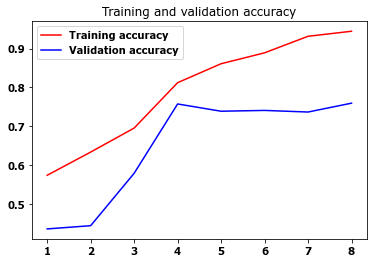

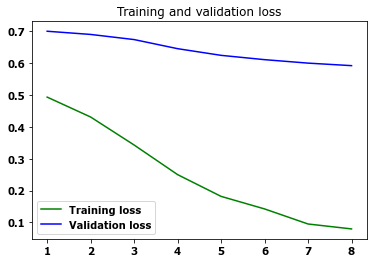

In [114]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


So here we can observe that our model has converged with 4th epoch for train and validation accuracy . So at the 4th epoch we have no overfitting. But thing in CNN is its slow and scored relatively less f1 score of 0.57 . So CNN is definitely not recommended here. I also added more layer but that decreased the f1 score possibly because the trainable parameters increased .So the bottomline is we simply need more data to train on for CNN.

# 5f.Recurrent Neural Networks

In [100]:
def get_rnn_model():
    model = Sequential()
    
    model.add(Embedding(max_words, 100, input_length=max_len))
    model.add(LSTM(55))
    
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(150, activation='relu'))
    
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    

    model.add(Dense(2, activation='sigmoid'))
    
    model.summary()
    
    return model

In [102]:
loss = 'binary_crossentropy'
model3 = get_rnn_model()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 2418, 100)         456700    
_________________________________________________________________
lstm_1 (LSTM)                (None, 55)                34320     
_________________________________________________________________
dropout_8 (Dropout)          (None, 55)                0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 55)                220       
_________________________________________________________________
dropout_9 (Dropout)          (None, 55)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 150)               8400      
_________________________________________________________________
dropout_10 (Dropout)         (None, 150)              

In [104]:
learning_rate = 0.001
optimizer = Adam(learning_rate)
# optimizer = Adam()

model3.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

verbose = 1
epochs =8
batch_size = 128
validation_split = 0.2



history3 = model3.fit(
    X_train_seq,
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=verbose,
    callbacks=callbacks,
    validation_split=validation_split,
    class_weight = {0:0.6,1:0.4}
    )

Epoch 1/8
16/16 [==============================] - 103s 6s/step - loss: 0.4705 - accuracy: 0.5254 - val_loss: 0.6883 - val_accuracy: 0.6245
Epoch 2/8
16/16 [==============================] - 183s 11s/step - loss: 0.4232 - accuracy: 0.5841 - val_loss: 0.6869 - val_accuracy: 0.6577
Epoch 3/8
16/16 [==============================] - ETA: 0s - loss: 0.3793 - accuracy: 0.6272 
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
16/16 [==============================] - 187s 12s/step - loss: 0.3793 - accuracy: 0.6272 - val_loss: 0.6884 - val_accuracy: 0.6079
Epoch 4/8
16/16 [==============================] - ETA: 0s - loss: 0.3651 - accuracy: 0.6397 
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
16/16 [==============================] - 189s 12s/step - loss: 0.3651 - accuracy: 0.6397 - val_loss: 0.6911 - val_accuracy: 0.4440
Epoch 5/8
16/16 [==============================] - ETA: 0s - loss: 0.3459 - accuracy: 0.6459 
Epoch 00005: Re

In [105]:
test_pred1 = model3.predict(X_test_seq)
train_pred1 = model3.predict(X_train_seq)
test_pred_class1 = np.argmax(test_pred1,axis=1)#taking maximum probabilities of two class as our classification
actual_test_pred_class = np.argmax(Y_test,axis=1)
train_pred_class1 = np.argmax(train_pred1,axis=1)
actual_train_pred_class = np.argmax(Y_train,axis=1)
from sklearn.metrics import classification_report
print(classification_report(actual_test_pred_class,test_pred_class1))
print(classification_report(actual_train_pred_class,train_pred_class1))

              precision    recall  f1-score   support

           0       0.55      0.60      0.57       247
           1       0.70      0.65      0.68       355

    accuracy                           0.63       602
   macro avg       0.62      0.63      0.62       602
weighted avg       0.64      0.63      0.63       602

              precision    recall  f1-score   support

           0       0.59      0.67      0.63       988
           1       0.75      0.68      0.71      1420

    accuracy                           0.68      2408
   macro avg       0.67      0.67      0.67      2408
weighted avg       0.68      0.68      0.68      2408



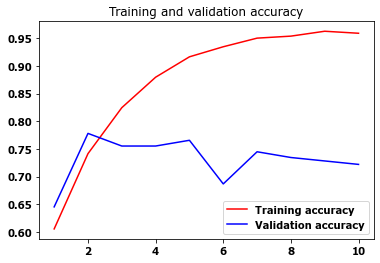

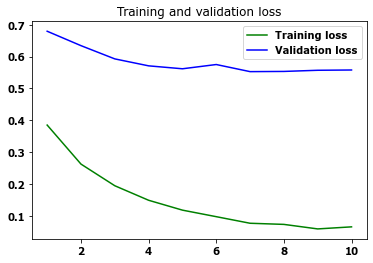

In [113]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


So our model hasnt quite converged yet and its stuck in local minima . Lets try and increase epochs and also increase learning rates so as to dodge local minima

In [107]:
loss = 'binary_crossentropy'
learning_rate = 0.0025
optimizer = Adam(learning_rate)
# optimizer = Adam()

model3.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

verbose = 1
epochs =10
batch_size = 128
validation_split = 0.2



history3 = model3.fit(
    X_train_seq,
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=verbose,
    callbacks=callbacks,
    validation_split=validation_split,
    class_weight = {0:0.6,1:0.4}
    )

Epoch 1/10
16/16 [==============================] - 126s 8s/step - loss: 0.3849 - accuracy: 0.6054 - val_loss: 0.6799 - val_accuracy: 0.6452
Epoch 2/10
16/16 [==============================] - 187s 12s/step - loss: 0.2622 - accuracy: 0.7414 - val_loss: 0.6346 - val_accuracy: 0.7780
Epoch 3/10
16/16 [==============================] - 188s 12s/step - loss: 0.1941 - accuracy: 0.8245 - val_loss: 0.5929 - val_accuracy: 0.7552
Epoch 4/10
16/16 [==============================] - 189s 12s/step - loss: 0.1485 - accuracy: 0.8795 - val_loss: 0.5711 - val_accuracy: 0.7552
Epoch 5/10
16/16 [==============================] - 184s 11s/step - loss: 0.1174 - accuracy: 0.9164 - val_loss: 0.5619 - val_accuracy: 0.7656
Epoch 6/10
16/16 [==============================] - ETA: 0s - loss: 0.0969 - accuracy: 0.9346 
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0012499999720603228.
16/16 [==============================] - 171s 11s/step - loss: 0.0969 - accuracy: 0.9346 - val_loss: 0.5752 - val_ac

              precision    recall  f1-score   support

           0       0.79      0.55      0.65       247
           1       0.74      0.90      0.81       355

    accuracy                           0.75       602
   macro avg       0.76      0.72      0.73       602
weighted avg       0.76      0.75      0.74       602

              precision    recall  f1-score   support

           0       0.96      0.82      0.88       988
           1       0.88      0.98      0.93      1420

    accuracy                           0.91      2408
   macro avg       0.92      0.90      0.91      2408
weighted avg       0.92      0.91      0.91      2408



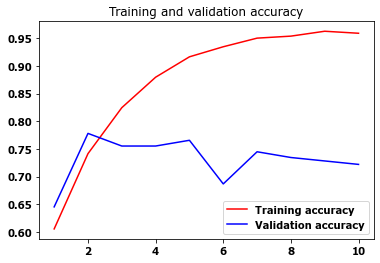

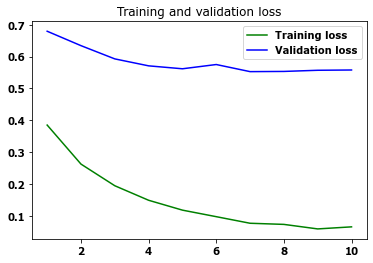

In [109]:
test_pred1 = model3.predict(X_test_seq)
train_pred1 = model3.predict(X_train_seq)
test_pred_class1 = np.argmax(test_pred1,axis=1)#taking maximum probabilities of two class as our classification
actual_test_pred_class = np.argmax(Y_test,axis=1)
train_pred_class1 = np.argmax(train_pred1,axis=1)
actual_train_pred_class = np.argmax(Y_train,axis=1)
from sklearn.metrics import classification_report
print(classification_report(actual_test_pred_class,test_pred_class1))
print(classification_report(actual_train_pred_class,train_pred_class1))
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


So we got 0.65 by increasing learning rate and dodging bad local minima....By increasing the neurons we can achieve even better accuracy but that takes too much of time . SO in terms of speed and accuracy , this can be optimal. Model though slightly overfits.

# 6.Model Summary and conclusions

In [110]:
models = ['Naive bayes','SVM','Random Forest','XGboost','CNN','RNN']
train_f1_for_0 = [0.86,0.93,0.76,0.84,0.73,0.88]
validation_f1_for_0 = [0.7,0.66,0.68,0.61,0.57,0.65]
models_f1 = pd.DataFrame(list(zip(models,train_f1_for_0,validation_f1_for_0)),columns=['model','train','test'])

In [111]:
models_f1

,model,train,test
0,Naive bayes,0.86,0.70
1,SVM,0.93,0.66
2,Random Forest,0.76,0.68
3,XGboost,0.84,0.61
4,CNN,0.73,0.57
5,RNN,0.88,0.65


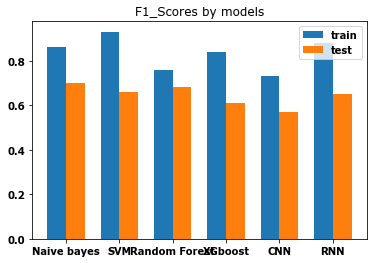

In [112]:
import numpy as np

import matplotlib.pyplot as plt
N=6


fig, ax = plt.subplots()

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind,models_f1['train'], width)



p2 = ax.bar(ind + width, models_f1['test'], width)

ax.set_title('F1_Scores by models')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(models_f1['model'])

ax.legend((p1[0], p2[0]), ('train', 'test'))
ax.autoscale_view()

plt.show()

f1 scores for train and validation for each models are shown . if difference between bars are more , model over fits. So we can infer from here that Random forest has least overfitting with goof f1 score. Also RNN can work good here cause of its good validation score. Naive Bayes performs well too......XGBoost , SVM , CNN performs poorly with overfitting the model.

# 7.Conclusions and Recommendations 

1.Lion King was success among audience with 72% of positive sentiments

2.They loved that its family movie , timon and Pumba jokes and it stayed true to the original.

3.KMeans and LDA performed poorly here.

4.Naive Bayes , Random Forest , RNN worked wonders

5.SVM , XGBoost , CNN overfitted data.

6.Random Forest works well with relatively less feature space.

7.Random Forest is most optimal model in terms of speed and accuracy.


My preferance of model selection considering both speed , accuracy , model complexity:

1st Random Forest

2nd Naive Bayes

3rd  RNN

4th SVM

5th CNN

6th XGBoost

Some suggestions for Disney and rotten tomatoes for improvement:

1.Disney should try and implement new technologies for facial expressions , it can help them to get 8-10% extra positive reviews.

2.They can try and bring some little originality to the movie compared to original one.

3.Try and insert more emotional aspect as some of reviews criticized lack of it.

4.Rotten Tomatoes should try and verify all the reviews as it has possibilty of fake reviews.

5.Also if possible , they can implement a rule of 1 review for user per movie , because audience are reviewing a movie multiple time.


For even better model buiding , we can collect more data for good accuracy.